# Script description
This is a script used in the publication: Walther R, Lancaster C, Burden J, Pichaud F 'A Dystroglycan-Laminin-Integrin axis controls cell basal geometry remodeling in the developing Drosophila retina'

This scrips takes segmentation shape descriptors from Cell Pose segmentation and Napari based regionprops analysis. 
It then performs a PCA to generate PCA plots and correlation circle plots for further analysis and decomposition of variables contributing to the principal compotents

In [1]:
#Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from scipy import stats
import scipy as sp
import glob


In [2]:
#read datafiles
#Set file directory
os.chdir('/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/Revision/databases_final')
print(os.getcwd())

/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/Revision/databases_final


In [3]:
#list all csv files
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Dg_ID3_measurements_scaled.csv',
 'data_check.csv',
 'ID3_LanB1_sg_measurements_scaled.csv',
 'ID2_Dg_GFP_GFPIR_measurements_scaled.csv',
 'ID12_wt_measurements_scaled.csv',
 'ID8_Dys_measurements_scaled.csv',
 'ID7_Dys_measurements_scaled.csv',
 'ID2_GFP_RNAi_DysGFP_measurements_scaled.csv',
 'ID3_GFP_RNAi_Dys_Mimic_measurements_scaled.csv',
 'ID2_LanB1_sg_measurements_scaled.csv',
 'ID1_Dys_measurements_scaled.csv',
 'Dg_ID2_measurements_scaled.csv',
 'ID1_GFP_RNAi_DysGFP_measurements_scaled.csv',
 'ID9_wt_measurements_scaled.csv',
 'Dg_ID1_measurements_scaled.csv',
 'ID1_Dg_GFP_GFPIR_measurements_scaled.csv',
 'ID1_LanB1_sg_measurements_scaled.csv',
 'ID3_DgGFP_GFPIR_measurements_scaled.csv',
 'ID10_wt_measurements_scaled.csv']

In [4]:
df_append = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file)
            df_append = df_append.append(df_temp, ignore_index=True)
            
            

/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_23322/126826932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_23322/126826932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_23322/126826932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_23322/126826932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

In [5]:
#Drop unwanted columns from dataframe and save it as a new dataframe
drop_columns = ['area_pixels','label','bbox_area','convex_area','equivalent_diameter','max_intensity',
               'mean_intensity', 'min_intensity','perimeter_pixels','perimeter_crofton','local_centroid-0',
               'local_centroid-1','standard_deviation_intensity']


df_reduced=df_append.drop(columns=drop_columns)

df_reduced

#Drop the last column which is duplicated
df_reduced=df_reduced.iloc[: , :-3]

df_reduced

,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,index,perimeter,area,cell_shape_index,cell_type,id,Unnamed: 0.1
0,0,0.572937,0.892581,91.137259,81.109958,45.273228,-0.215583,0.829726,1.791566,0.514612,0.496342,0,1,18.310878,13.243090,5.031697,bristle,Dg_IR,NaN
1,1,0.560650,0.886430,145.578158,131.225294,72.207942,0.888210,0.834994,1.817325,0.515357,0.507001,0,2,29.332726,34.713930,4.978523,secondary,Dg_IR,NaN
2,2,0.572533,0.856944,63.324561,59.526565,44.383640,1.225844,0.666382,1.341183,0.665112,0.527741,0,3,14.816070,9.218864,4.879713,bristle,Dg_IR,NaN
3,3,0.658951,0.896588,85.070559,80.251412,57.455235,1.465259,0.698161,1.396764,0.675340,0.590601,0,4,19.026203,17.013312,4.612726,bristle,Dg_IR,NaN
4,4,0.579556,0.859800,69.971423,66.284542,37.426430,1.062370,0.825342,1.771062,0.522494,0.528192,0,5,14.616461,8.979801,4.877630,NaN,Dg_IR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12139,261,0.702621,0.862563,107.935166,101.729503,76.885278,-1.569145,0.654824,1.323134,0.718873,0.578835,0,286,25.135132,29.100932,4.659376,NaN,wild_type,NaN
12140,262,0.811577,0.905782,190.517716,203.694145,66.651033,-1.553588,0.944951,3.056129,0.315369,0.493136,0,287,36.115210,51.184370,5.048025,secondary,wild_type,NaN
12141,263,0.722795,0.891782,53.366656,52.276890,38.472184,-1.491580,0.677057,1.358823,0.717948,0.655018,0,288,12.134315,7.674916,4.380044,NaN,wild_type,NaN
12142,264,0.500000,0.769231,5.830952,6.774468,2.338072,-0.626400,0.938555,2.897460,0.277434,1.256637,0,290,0.705725,0.049805,3.162278,NaN,wild_type,NaN


In [6]:
#Deletes rows with NA. This is for cell types that can't be assigned

df_dropped=df_reduced.dropna()
df_dropped



,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,index,perimeter,area,cell_shape_index,cell_type,id,Unnamed: 0.1
330,0,0.572937,0.892581,91.137259,81.109958,45.273228,-0.215583,0.829726,1.791566,0.514612,0.496342,0,1,18.310878,13.243090,5.031697,bristle,Dg_IR,0.0
331,1,0.560650,0.886430,145.578158,131.225294,72.207942,0.888210,0.834994,1.817325,0.515357,0.507001,0,2,29.332726,34.713930,4.978523,secondary,Dg_IR,1.0
332,2,0.572533,0.856944,63.324561,59.526565,44.383640,1.225844,0.666382,1.341183,0.665112,0.527741,0,3,14.816070,9.218864,4.879713,bristle,Dg_IR,2.0
333,3,0.658951,0.896588,85.070559,80.251412,57.455235,1.465259,0.698161,1.396764,0.675340,0.590601,0,4,19.026203,17.013312,4.612726,bristle,Dg_IR,3.0
335,5,0.712932,0.929168,106.733313,107.097406,64.066773,1.443333,0.801339,1.671653,0.567914,0.590925,0,6,23.277677,25.480124,4.611465,tertiary,Dg_IR,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,254,0.777474,0.957025,66.068147,62.481235,53.477800,-0.443480,0.517138,1.168358,0.835258,0.715297,0,277,14.969323,12.755004,4.191427,bristle,wild_type,6060.0
6391,255,0.694178,0.787303,97.169954,98.387779,52.104999,-1.487987,0.848255,1.888260,0.446942,0.489332,0,278,20.847333,16.923663,5.067611,bristle,wild_type,6061.0
6392,256,0.681460,0.809482,174.413302,187.303573,49.658163,-1.558562,0.964215,3.771859,0.232381,0.421700,0,279,30.826931,31.889999,5.458874,secondary,wild_type,6062.0
6394,258,0.769382,0.880698,198.176689,211.133780,64.159441,-1.563230,0.952710,3.290767,0.291394,0.505648,0,283,35.535227,50.810834,4.985181,secondary,wild_type,6064.0


In [7]:
#Split dataframe for each condition to do PCA on each genotype

wildtype=df_dropped[df_dropped["id"]=='wild_type']

GFP_RNAi_DysMIM=df_dropped[df_dropped["id"]=='GFP_IR_DysGFP']

Dg_IR=df_dropped[df_dropped["id"]=='Dg_IR']

LanB1_sg=df_dropped[df_dropped["id"]=='LanB1_sg']

Dys_IR=df_dropped[df_dropped["id"]=='Dys_IR']
 
GFP_RNAi_Dg=df_dropped[df_dropped["id"]=='GFP_IR_DgGFP']



,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,index,perimeter,area,cell_shape_index,cell_type,id,Unnamed: 0.1
1300,0,0.247905,0.493950,165.469030,123.930942,107.314172,1.025391,0.500184,1.154842,0.480567,0.260711,0,1,37.304629,28.871830,6.942655,tertiary,wild_type,970.0
1301,1,0.409198,0.780848,173.528096,183.437139,53.131041,0.444633,0.957135,3.452542,0.236340,0.435826,0,2,29.949182,31.108064,5.369681,secondary,wild_type,971.0
1302,2,0.489804,0.889496,170.672200,178.830350,56.399419,-0.479205,0.948966,3.170784,0.298361,0.540778,0,3,29.450159,37.323700,4.820536,secondary,wild_type,972.0
1303,3,0.339865,0.718407,182.024724,207.367042,45.932615,0.489766,0.975159,4.514593,0.160750,0.355009,0,4,30.937197,27.039014,5.949569,secondary,wild_type,973.0
1304,4,0.273613,0.542594,179.780422,130.509865,111.130195,-0.266340,0.524342,1.174387,0.510407,0.280882,0,5,39.005461,34.006702,6.688722,tertiary,wild_type,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,254,0.777474,0.957025,66.068147,62.481235,53.477800,-0.443480,0.517138,1.168358,0.835258,0.715297,0,277,14.969323,12.755004,4.191427,bristle,wild_type,6060.0
6391,255,0.694178,0.787303,97.169954,98.387779,52.104999,-1.487987,0.848255,1.888260,0.446942,0.489332,0,278,20.847333,16.923663,5.067611,bristle,wild_type,6061.0
6392,256,0.681460,0.809482,174.413302,187.303573,49.658163,-1.558562,0.964215,3.771859,0.232381,0.421700,0,279,30.826931,31.889999,5.458874,secondary,wild_type,6062.0
6394,258,0.769382,0.880698,198.176689,211.133780,64.159441,-1.563230,0.952710,3.290767,0.291394,0.505648,0,283,35.535227,50.810834,4.985181,secondary,wild_type,6064.0


In [8]:
#Functon for PCA analysis 
#Global is used so the variable can be used and modified outside of the function
#Otherwise the PCA output cannot be used downstream in other analysis e.g. circle plots


def PCA_(dataframe,target_select,labels,save_option,filename):
    #PCA between cell types within a single genotpye - I have 'cell_type' as target

    #PCA analysis to reduce the dimentions of the data to be ploted in 2D

    from sklearn.preprocessing import StandardScaler

    global features
    features=['extent','major_axis_length','minor_axis_length','eccentricity',
             'roundness','circularity','area','cell_shape_index','perimeter']
    

    # Separating out the features
    global x
    x = dataframe.loc[:, features].values
    

    # Separating out the target
    global y
    y = dataframe.loc[:,['cell_type']].values
    

    # Standardizing the features
   
    x = StandardScaler().fit_transform(x)
    

    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    
    dataframe= dataframe.reset_index()

    finalDf = pd.concat([principalDf, dataframe[['cell_type']]], axis = 1)
    finalDf = pd.concat([finalDf, dataframe[['index']]], axis = 1)
    
    global pca_out
    
    pca_out = PCA().fit(x)
    
    # Export the DataFrame to a CSV file
    #finalDf.to_csv(filename + 'PCA_dataframe.csv', index=False)
    
    target=target_select

    target_labels=labels


    fig = plt.figure(figsize = (12,11))
    ax = fig.add_subplot(1,1,1) 

    ax.tick_params(width=6)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(6)

    ax.set_xlabel('PC1', fontsize = 45, fontname="Helvetica")
    ax.set_ylabel('PC2', fontsize = 45, fontname="Helvetica")
    targets = target
    colors = ['m', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['cell_type'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 100)
        
    ax.legend(target_labels, fontsize=20)
    


    plt.yticks(fontsize=35)
    plt.xticks(fontsize=35)

    sns.despine()
    
    print(pca.explained_variance_ratio_)

    if save_option==1:

        plt.savefig(filename + 'PCA_plots.png', dpi=500)

[0.61848493 0.25300917]


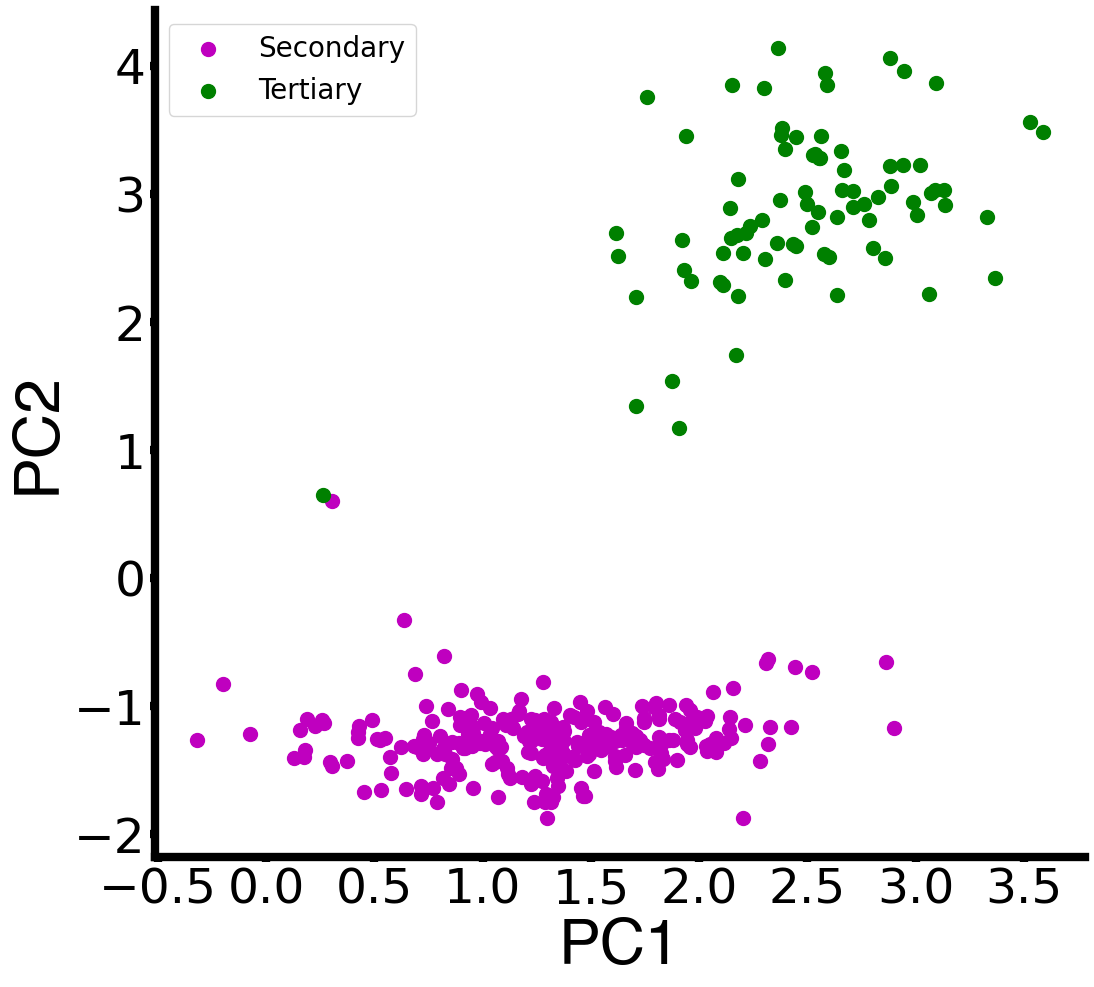

In [9]:
#Create PCA plot with PCA_ function

target_select=['secondary','tertiary']
labels=['Secondary','Tertiary']


PCA_(wildtype, target_select, labels,0,'wild_type_revision')

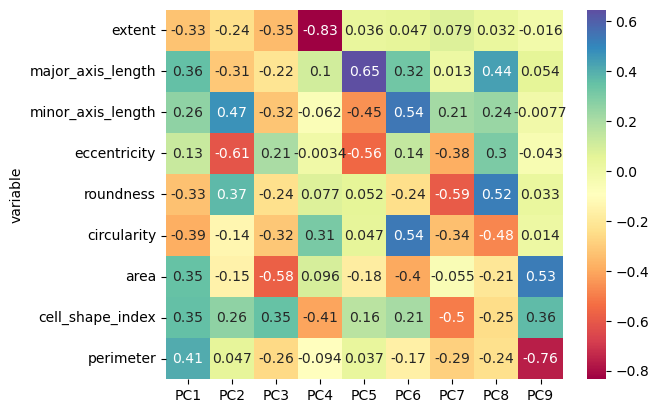

In [10]:
##This is retrieving all of the parameter contributions to the analysis i.e. the eigenvectors and values from the covariecne matrix

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


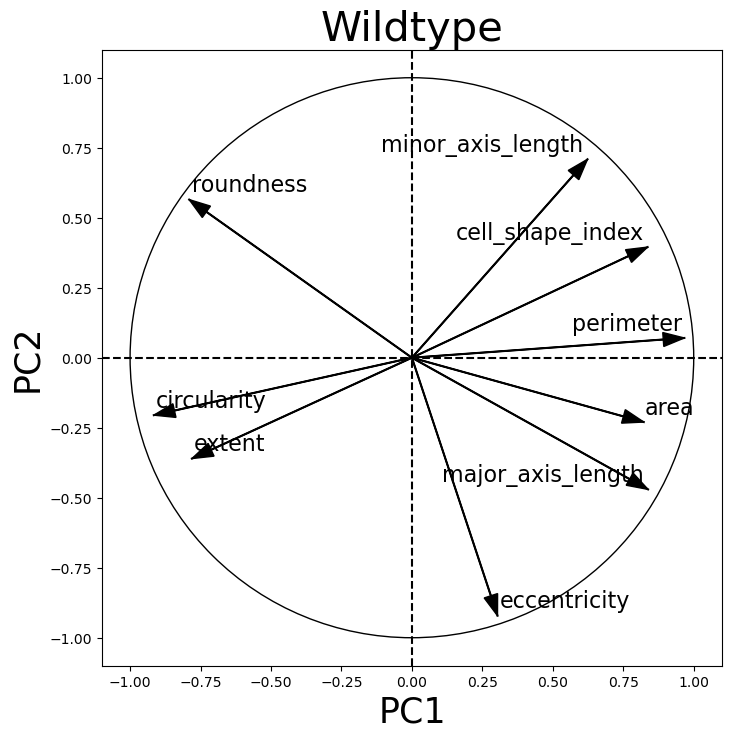

In [11]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Wildtype', fontsize=30)

plt.savefig('Correlation_circle_revision_WT.png', dpi=500)

[0.59155356 0.2896604 ]


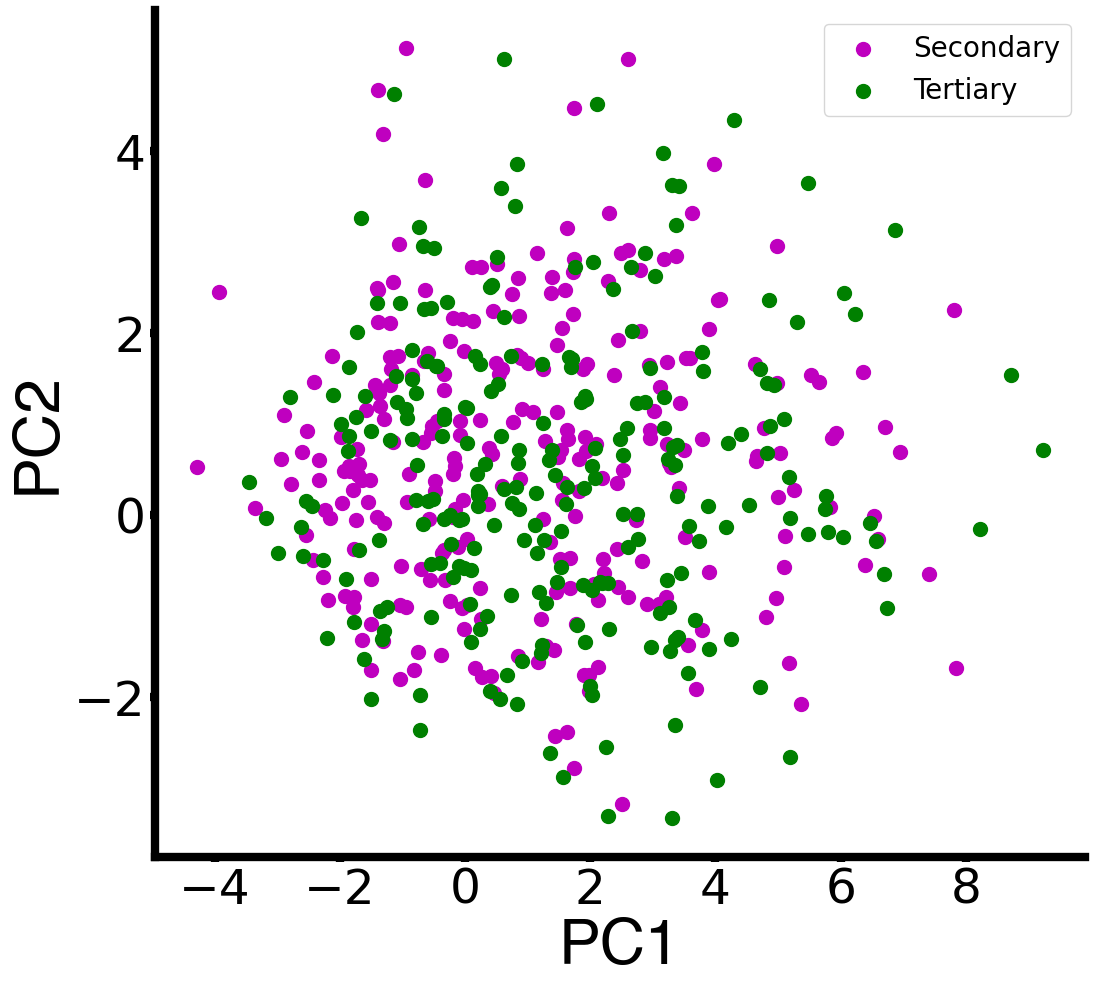

In [12]:
target_select=['secondary','tertiary']
labels=['Secondary','Tertiary']


PCA_(Dg_IR, target_select, labels, 0, 'Dg_IR_revision')

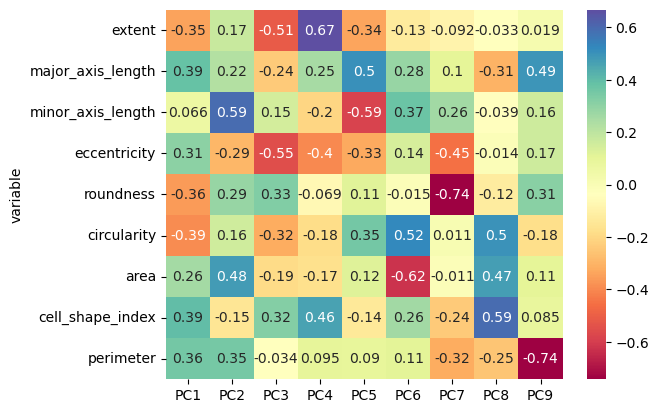

In [13]:

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


Text(0.5, 1.0, 'Dg_IR')

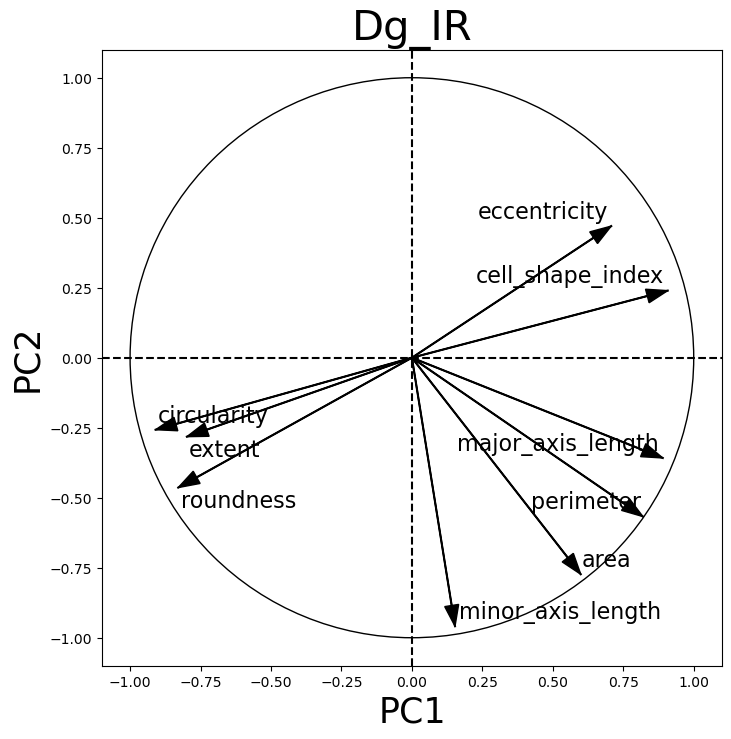

In [14]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Dg_IR', fontsize=30)

#plt.savefig('Correlation_circle_Revision_Dg_IR_.png', dpi=500)

[0.61126563 0.187236  ]


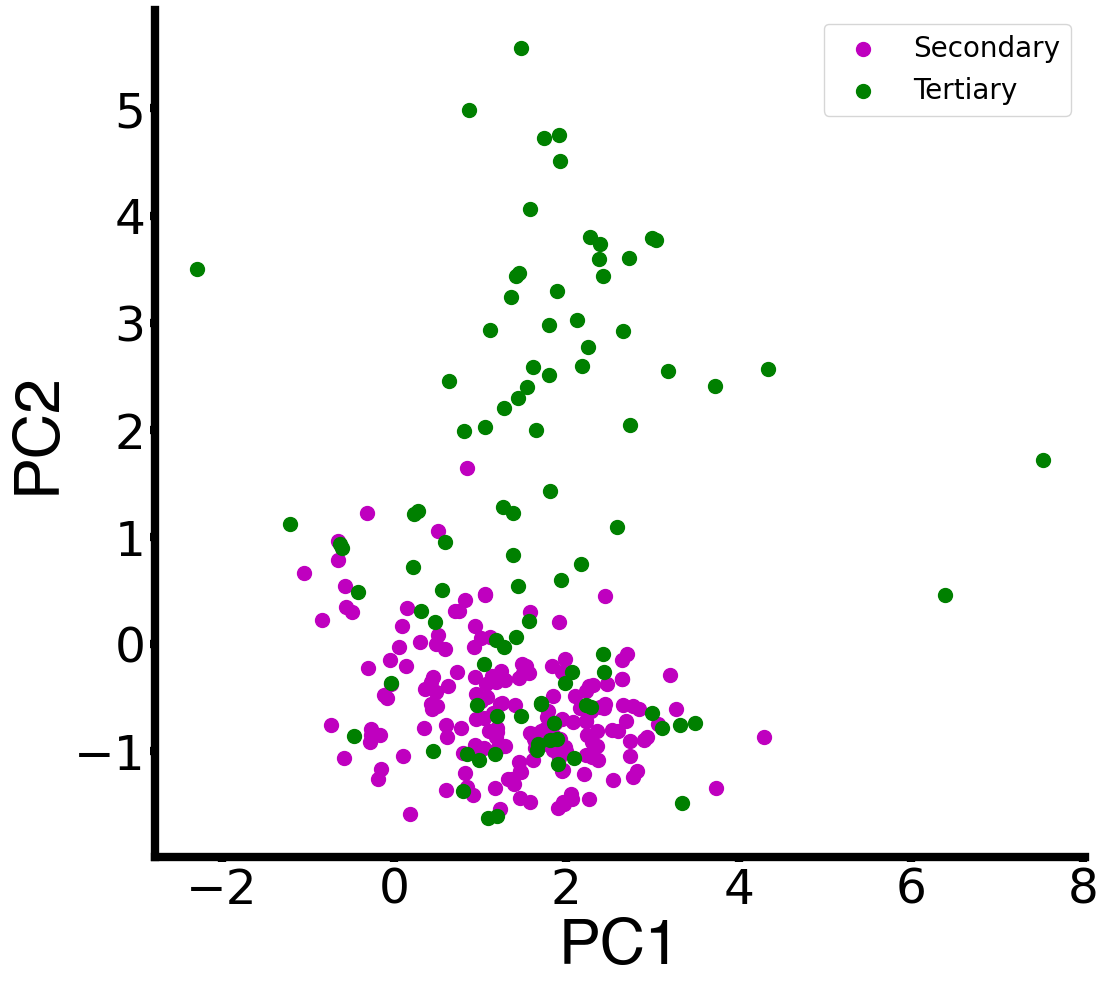

In [15]:
target_select=['secondary','tertiary']
labels=['Secondary','Tertiary']


PCA_(LanB1_sg, target_select, labels, 0, 'LanB1_sg')

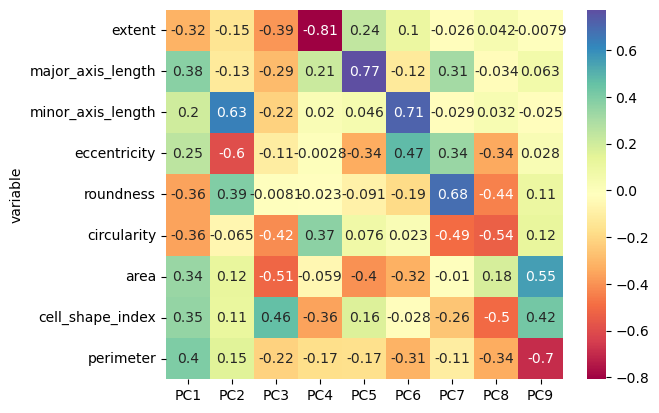

In [16]:

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

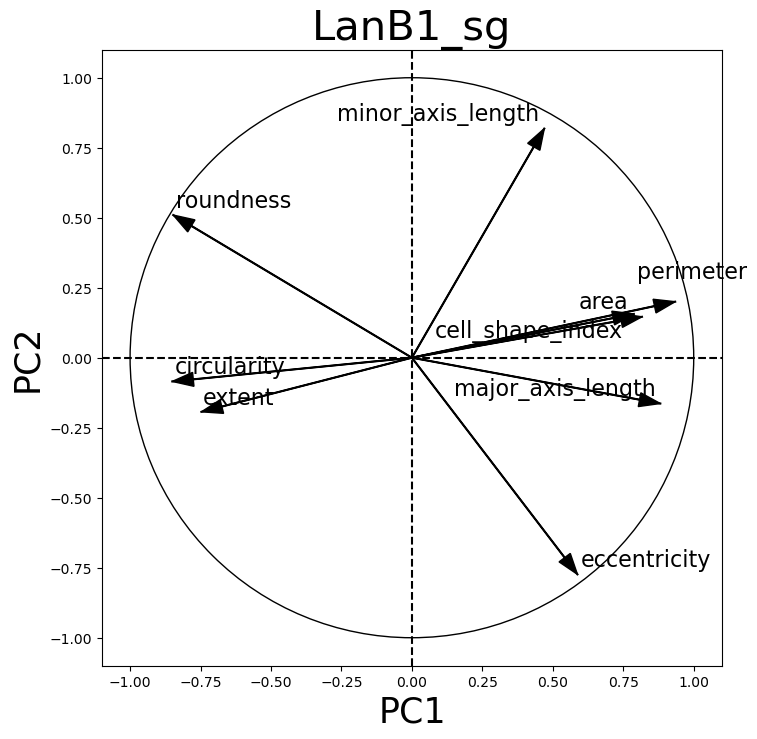

In [17]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('LanB1_sg', fontsize=30)

plt.savefig('Correlation_circle_Revision_LanB1_sg_KO_.png', dpi=500)

[0.6423235  0.22926743]


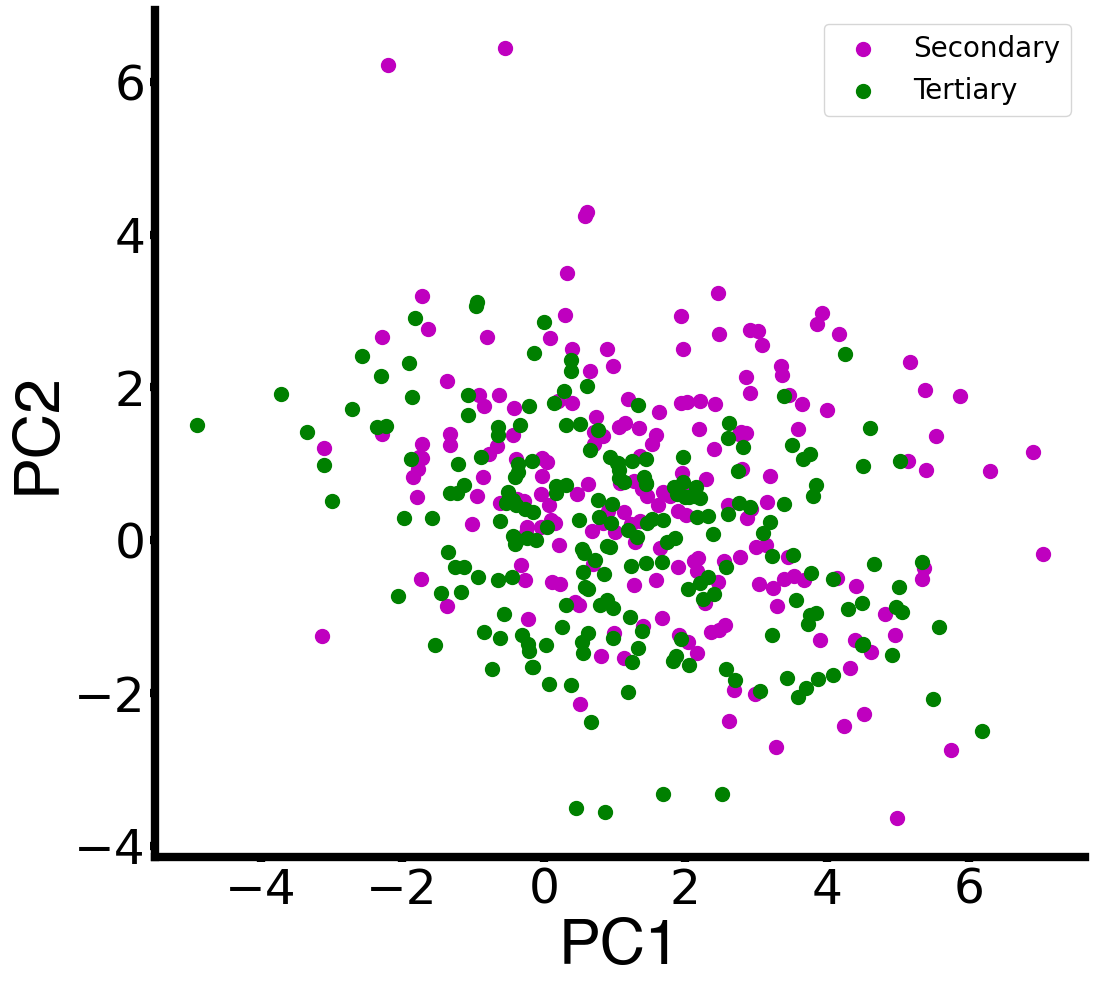

In [18]:

target_select=['secondary','tertiary']
labels=['Secondary','Tertiary']


PCA_(GFP_RNAi_DysMIM, target_select, labels, 0, 'GFP_RNAi_DysMiMic')

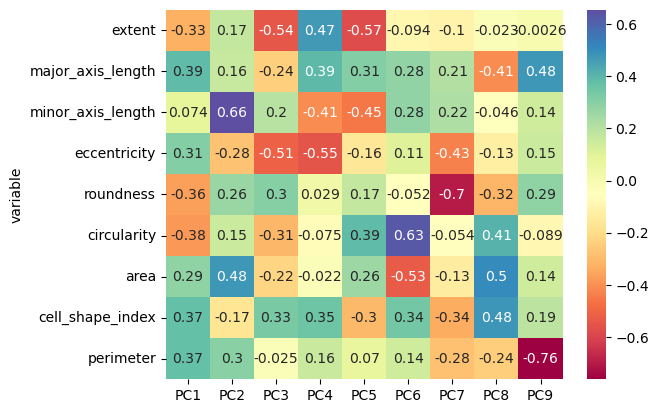

In [19]:

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

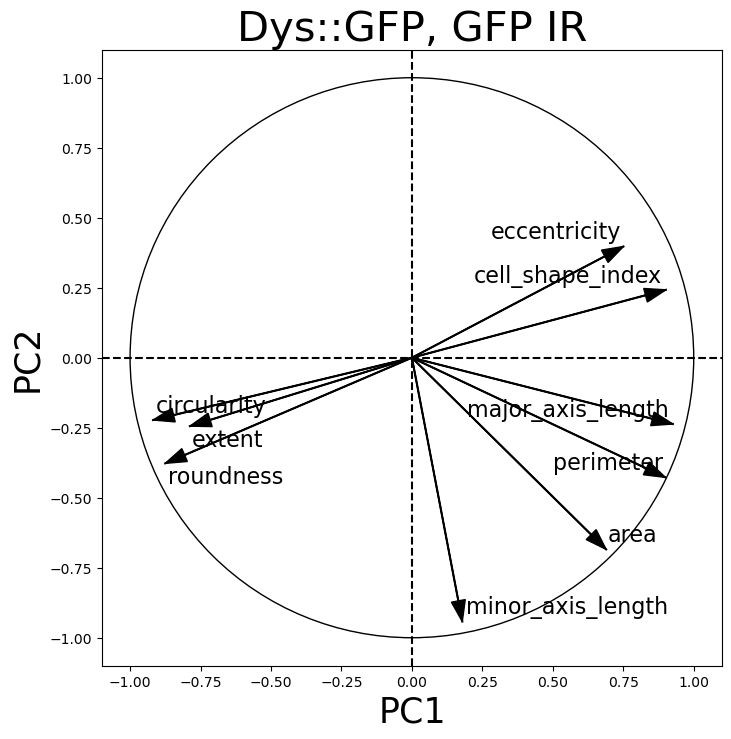

In [20]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Dys::GFP, GFP IR', fontsize=30)

plt.savefig('Correlation_circle_Revision_GFP_RNAi_DysMiMic_.png', dpi=500)

[0.46824087 0.37138215]


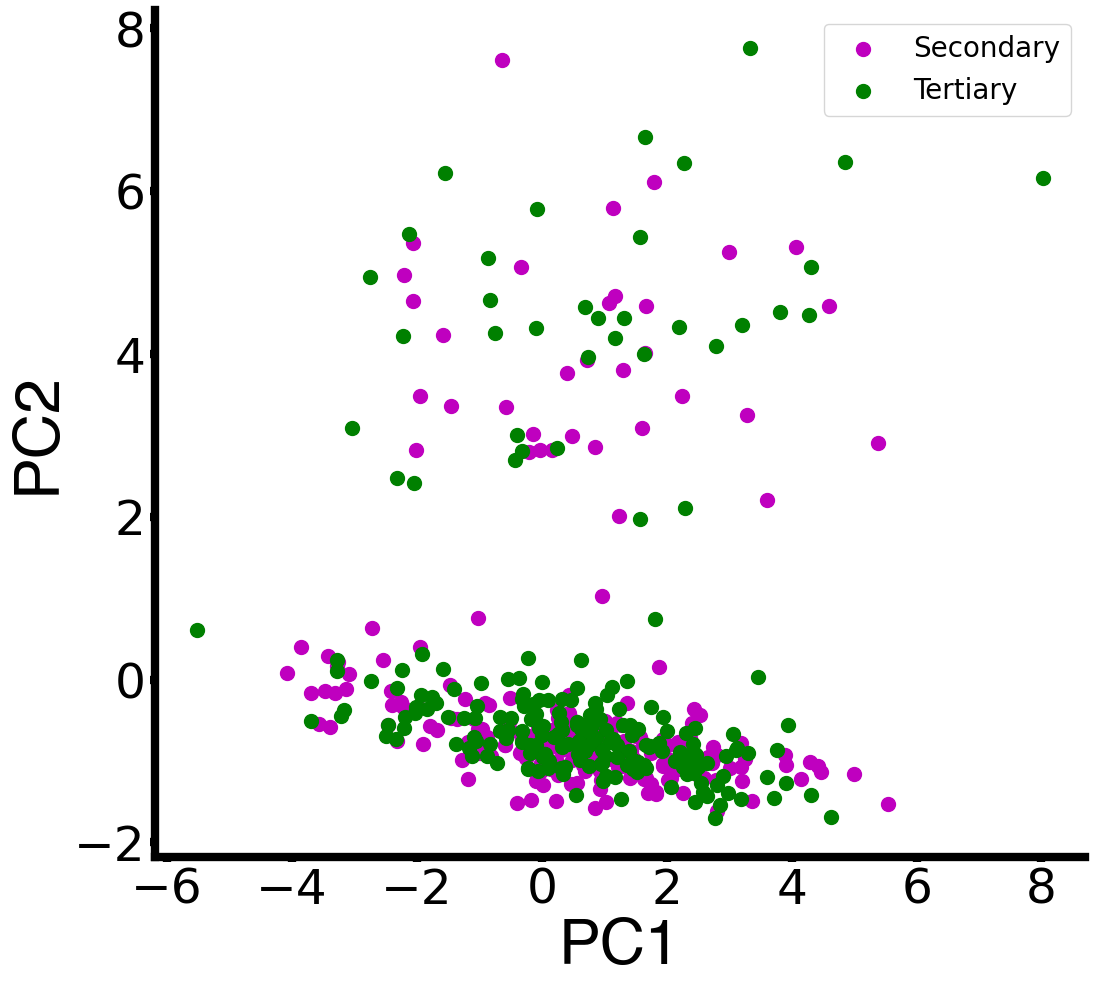

In [21]:
target_select=['secondary','tertiary']
labels=['Secondary','Tertiary']


PCA_(Dys_IR, target_select, labels, 0, 'Dys_IR')

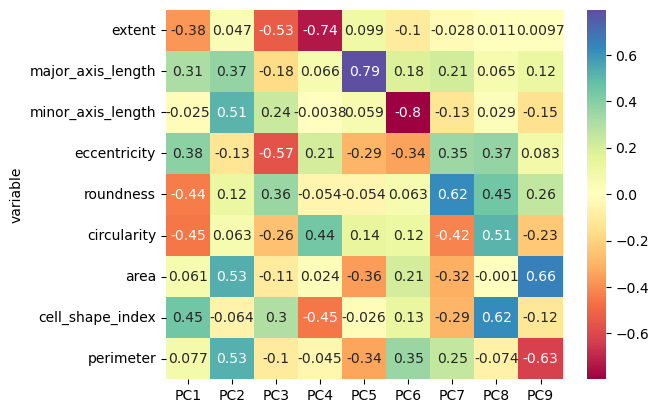

In [22]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

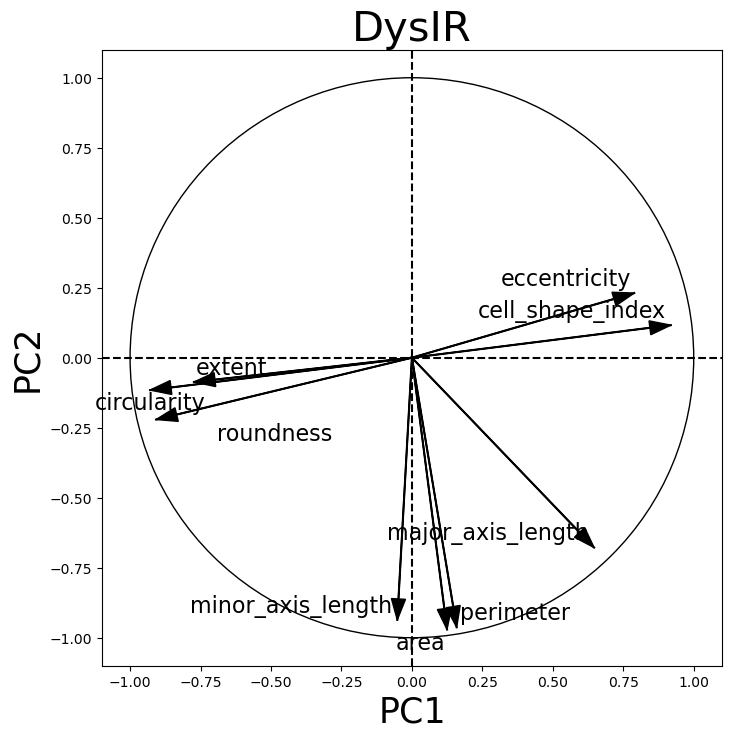

In [23]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('DysIR', fontsize=30)

plt.savefig('Correlation_circle_Revision_Dys_IR_.png', dpi=500)

[0.56999486 0.23128084]


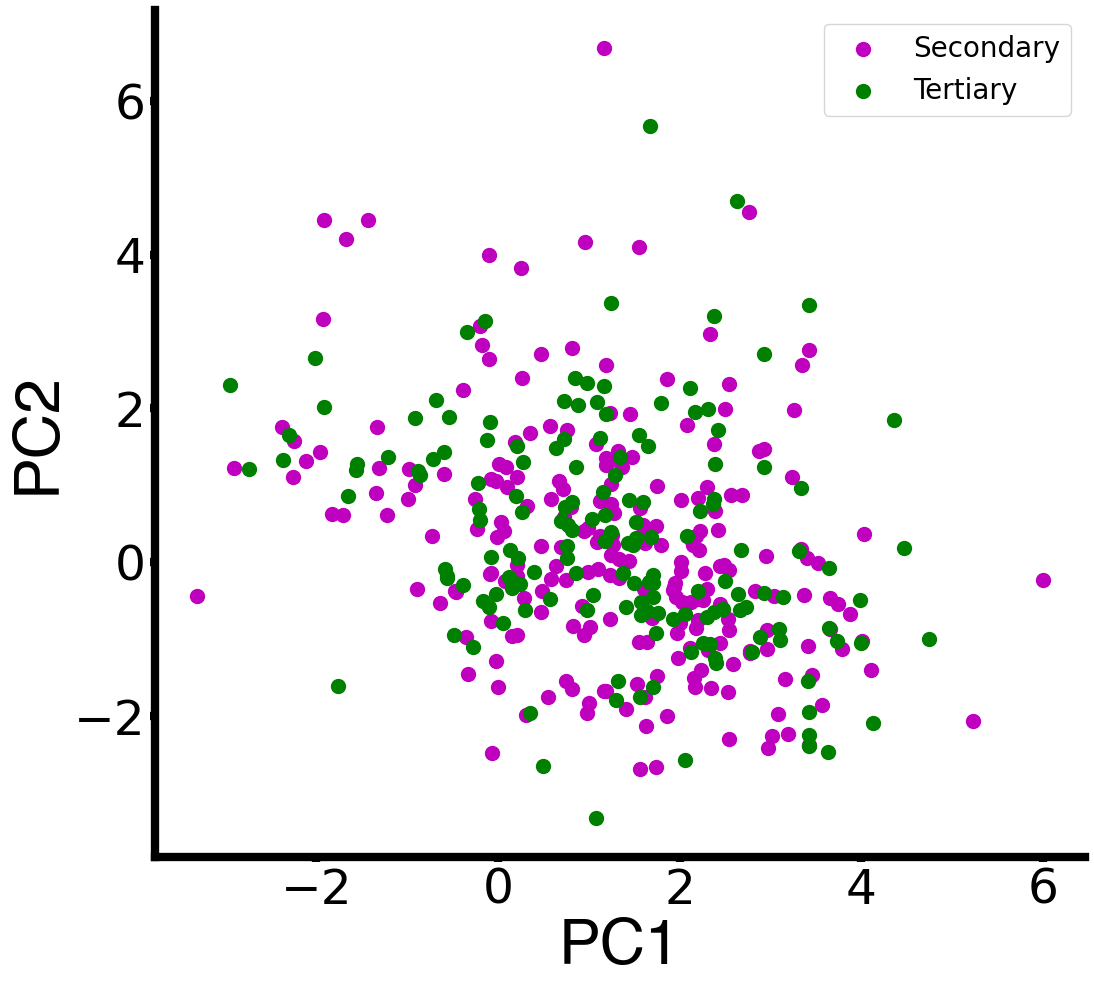

In [13]:


target_select=['secondary','tertiary']
labels=['Secondary','Tertiary']


PCA_(GFP_RNAi_Dg, target_select, labels,1,'GFPIR_DgGFP_revision')

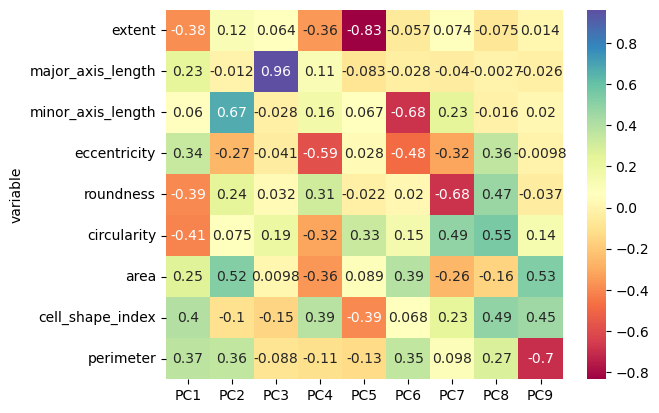

In [11]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

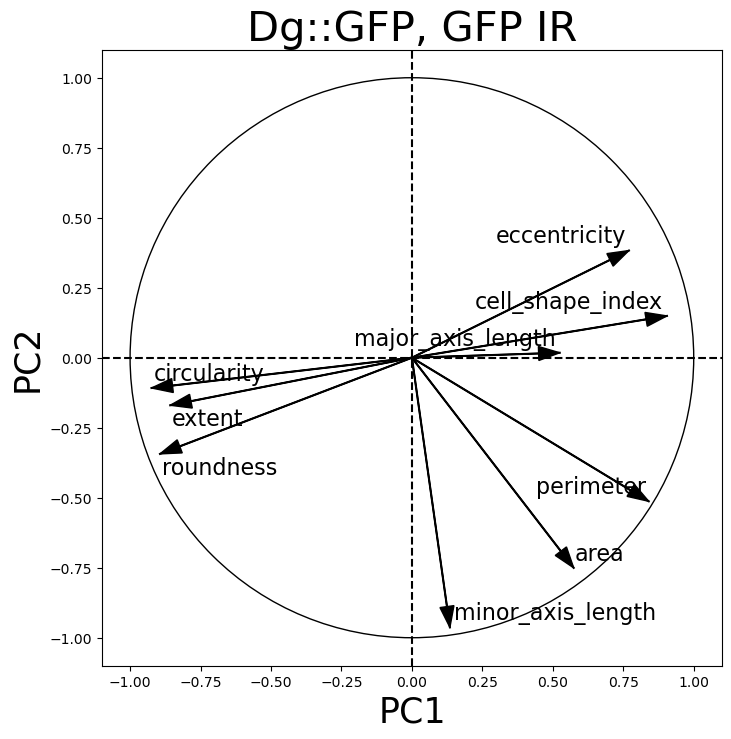

In [12]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Dg::GFP, GFP IR', fontsize=30)

plt.savefig('Correlation_circle_Revision_GFP_IR_DgGFP_.png', dpi=500)